In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from pandas import DataFrame
from numpy import array

nf1 = pd.read_csv('sales_train.csv')
nf2 = pd.read_csv('items.csv')

nf3 = nf1.drop(['date_block_num','shop_id','item_id','item_price','item_cnt_day'],axis=1)
nf3['item_sale'] = nf1.item_price*nf1.item_cnt_day


nf4 = nf3.groupby('date').sum().reset_index()

nf4['date']= pd.to_datetime(nf4['date'])

nf4 = nf4.sort_values('date')
nf4 = nf4.reset_index()
nf4 = nf4.drop('index',axis=1)
nf5 = nf4.drop('date',axis=1)

nf5_train = nf5[0:828]
nf5_test = nf5[828:1034]
nf5_test = nf5_test.reset_index()
nf5_test = nf5_test.drop('index',axis=1)
nf4


,date,item_sale
0,2013-01-01,1362942.00
1,2013-01-02,2536633.00
2,2013-01-03,2518542.40
3,2013-01-04,1823273.00
4,2013-01-05,2727292.98
...,...,...
1029,2015-12-06,2616036.44
1030,2015-12-07,2072214.98
1031,2015-12-08,1441878.35
1032,2015-12-09,3202689.34


## Univariate

In [23]:
#data prepration  
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


b = nf5_train.iloc[:,0:].values



In [24]:
# univariate lstm example

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(b, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
#x_input = array([2072214.98, 1441878.35, 3202689.34])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

In [25]:
x_input = array([1.276154e+07, 6.072350e+06,4.757648e+06])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<206):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[5593103.]
1 day input [6072350. 4757648. 5593103.]
1 day output [[5751983.]]
2 day input [4757648. 5593103. 5751983.]
2 day output [[5360383.]]
3 day input [5593103. 5751983. 5360383.]
3 day output [[5367573.5]]
4 day input [5751983.  5360383.  5367573.5]
4 day output [[5481352.5]]
5 day input [5360383.  5367573.5 5481352.5]
5 day output [[5416342.5]]
6 day input [5367573.5 5481352.5 5416342.5]
6 day output [[5356982.]]
7 day input [5481352.5 5416342.5 5356982. ]
7 day output [[5364201.5]]
8 day input [5416342.5 5356982.  5364201.5]
8 day output [[5352261.5]]
9 day input [5356982.  5364201.5 5352261.5]
9 day output [[5320083.5]]
10 day input [5364201.5 5352261.5 5320083.5]
10 day output [[5300512.5]]
11 day input [5352261.5 5320083.5 5300512.5]
11 day output [[5285503.5]]
12 day input [5320083.5 5300512.5 5285503.5]
12 day output [[5264651.5]]
13 day input [5300512.5 5285503.5 5264651.5]
13 day output [[5243689.5]]
14 day input [5285503.5 5264651.5 5243689.5]
14 day output [[5225094.5

138 day output [[3296581.]]
139 day input [3321160.  3308847.8 3296581. ]
139 day output [[3284359.8]]
140 day input [3308847.8 3296581.  3284359.8]
140 day output [[3272184.]]
141 day input [3296581.  3284359.8 3272184. ]
141 day output [[3260053.5]]
142 day input [3284359.8 3272184.  3260053.5]
142 day output [[3247967.8]]
143 day input [3272184.  3260053.5 3247967.8]
143 day output [[3235926.8]]
144 day input [3260053.5 3247967.8 3235926.8]
144 day output [[3223930.8]]
145 day input [3247967.8 3235926.8 3223930.8]
145 day output [[3211979.2]]
146 day input [3235926.8 3223930.8 3211979.2]
146 day output [[3200071.8]]
147 day input [3223930.8 3211979.2 3200071.8]
147 day output [[3188208.5]]
148 day input [3211979.2 3200071.8 3188208.5]
148 day output [[3176389.2]]
149 day input [3200071.8 3188208.5 3176389.2]
149 day output [[3164614.2]]
150 day input [3188208.5 3176389.2 3164614.2]
150 day output [[3152882.2]]
151 day input [3176389.2 3164614.2 3152882.2]
151 day output [[3141193.8]

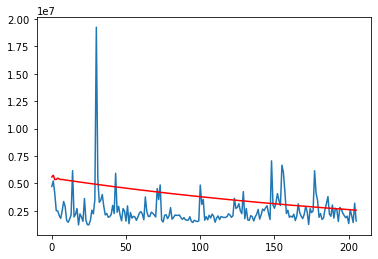

In [26]:
plt.plot(nf5_test)
plt.plot(lst_output, color='red')

## Multivariate

In [27]:
from datetime import datetime
nf6 = pd.merge(nf1,nf2).drop(['item_name'], axis=1)

#nf7['item_sale'] = nf6.groupby('item_category_id')
nf6['item_sale'] = nf6.item_price*nf6.item_cnt_day
nf7 = nf6.groupby(["date","shop_id"]).sum().reset_index()
#nf7 = nf7.sort_values(by=['shop_id'])

nf7 = nf7.drop(['date_block_num','item_id','item_price','item_cnt_day','item_category_id'],axis=1)
nf7['date'] = pd.to_datetime(nf7['date'], format="%d.%m.%Y")
nf7 = nf7.sort_values(by='date')

nf8 = pd.pivot_table(nf7, values='item_sale',index=['date'],columns=['shop_id'],aggfunc=np.sum,fill_value =0)
nf7

nf8['total_sale'] = nf8.sum(axis=1)

nf8

#Dataset containing each shop_id as columns,date as rows, and a total sale of the day column at last

shop_id,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,total_sale
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,31886.0,0.0,0.0,0.0,0.0,59993.0,44516,0.0,...,41411.0,0.0,0.0,316557.0,0.0,0.0,0.0,0.0,0.0,1362942.00
2013-01-02,0,0,75023.8,37305.0,121572.0,0.0,146819.0,147332.0,97050,0.0,...,56035.0,69886.0,105339.0,519336.0,0.0,225158.0,0.0,0.0,143931.0,6020512.03
2013-01-03,110588,108409,110521.0,58891.0,101108.0,0.0,128532.0,124552.0,73278,0.0,...,31080.0,76037.0,76654.5,375070.0,0.0,168691.0,0.0,0.0,155045.0,5436480.11
2013-01-04,231122,45079,62854.0,23231.0,88356.0,0.0,121015.0,90173.0,80960,0.0,...,37426.0,72385.0,97633.0,284419.0,0.0,101474.0,0.0,0.0,84128.0,4755664.00
2013-01-05,167500,103025,50181.0,21771.0,52292.0,0.0,107611.0,101877.0,61110,0.0,...,47338.0,28667.0,92861.0,400557.0,0.0,93415.0,0.0,0.0,103285.0,4587231.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-27,0,0,7822.0,26808.0,18728.0,17955.0,82989.0,26457.0,0,0.0,...,0.0,19526.0,24200.0,0.0,41341.0,26407.0,84759.0,79933.0,32313.0,2261143.13
2015-10-28,0,0,18238.0,13497.0,22458.0,15732.0,41674.0,33288.0,0,0.0,...,0.0,8136.0,19654.0,0.0,46368.0,10079.0,76346.0,26890.0,40210.0,1722150.10
2015-10-29,0,0,40685.0,22784.0,16553.0,23880.0,49688.0,25034.0,0,0.0,...,0.0,40249.0,21557.0,0.0,39617.0,16158.0,75966.0,31488.0,17027.0,1859613.14


In [9]:
#To check if there are duplicates 
dupli = nf7[nf7.duplicated(['date','shop_id'])]
print(dupli, sep='\n')

Empty DataFrame
Columns: [date, shop_id, item_sale]
Index: []


In [11]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from pandas import concat
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset

values = nf8.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.iloc[:,61:121], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.000000   0.047936   0.044448   0.000000        0.0   
2   0.000000   0.000000   0.112788   0.177724   0.240135        0.0   
3   0.335822   0.595118   0.166153   0.254841   0.199714        0.0   
4   0.701848   0.247464   0.094492   0.127443   0.174525        0.0   
5   0.508647   0.565562   0.075440   0.122227   0.103290        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var53(t-1)  var54(t-1)  \
1   0.000000   0.051144   0.396811    0.001695  ...    0.000000    0.000000   
2   0.091559   0.136723   0.858876    0.001695  ...    0.074325    0.212369   
3   0.080155   0.114402   0.649788    0.001695  ...    0.080867    0.154540   
4   0.075467   0.080716   0.717355    0.001695  ...    0.076983    0.196834   
5   0.067108   0.092184   0.542764    0.001695  ...    0.030488    0.187213   

   var55(t-1)  var56(t-1)  var57(t-1)  var58(t-1)  var59(t-1)  var60(t-1)  \
1    0.336086        

In [12]:
scaled

array([[0.        , 0.        , 0.04793626, ..., 0.        , 0.00924933,
        0.00476761],
       [0.        , 0.        , 0.11278806, ..., 0.        , 0.20179555,
        0.13652198],
       [0.33582241, 0.59511759, 0.16615327, ..., 0.        , 0.2166635 ,
        0.12000076],
       ...,
       [0.        , 0.        , 0.06116436, ..., 0.03548643, 0.03202749,
        0.01881755],
       [0.        , 0.        , 0.07495922, ..., 0.124189  , 0.03862269,
        0.04035123],
       [0.        , 0.        , 0.09598076, ..., 0.10474065, 0.06947295,
        0.05629283]])

In [13]:
print(scaler.data_max_)


[  329305.           182164.           665174.999999     267467.9999997
   506264.9999994    453221.          1603539.0000013   1028363.00000057
   113095.          2237366.99999983   317344.            64970.42
  3882145.9999994    167755.           678950.           769648.9999993
   544670.000001     558391.9999992   1559891.0000036    678938.
  1288510.           525345.9999992   1109920.00000205   113410.
   524409.000001    2268520.00000001   967694.           967758.00000013
  1040366.9999984    690775.9999999    926557.9999996   2177573.000004
    95766.           196117.00000001   141783.           982998.9999998
    59879.           550333.           868055.0000004    281518.
   105881.           737828.0000016   2319838.0000013   1229725.9999984
   320927.0000002    709859.9999989    846456.9999994    548838.
   293444.           275662.          1072066.000002     269142.
   940272.9999982    496017.9999994    949793.          2012560.99999887
   672921.9999991   1155257.99

In [14]:
print(scaler.data_min_)

[ 0.000000e+00  0.000000e+00  0.000000e+00 -1.244150e+04  0.000000e+00
  0.000000e+00  0.000000e+00  7.797000e+03 -5.990000e+02 -3.799000e+03
  0.000000e+00  0.000000e+00 -2.634400e+04  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 -5.999000e+03  0.000000e+00 -9.734000e+03  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00 -1.300000e+03  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00 -7.990000e+03 -2.750200e+04
  0.000000e+00  0.000000e+00  0.000000e+00  5.466000e+03  0.000000e+00
 -1.449000e+03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00 -1.170800e+04 -3.471000e+03
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -3.999000e+03
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -6.914000e+03
  1.194405e+06]


In [30]:
values

array([[0.        , 0.        , 0.04793626, ..., 0.00924933, 0.00476761,
        0.13652198],
       [0.        , 0.        , 0.11278806, ..., 0.20179555, 0.13652198,
        0.12000076],
       [0.33582241, 0.59511759, 0.16615327, ..., 0.2166635 , 0.12000076,
        0.10074168],
       ...,
       [0.        , 0.        , 0.02741835, ..., 0.06304096, 0.01492897,
        0.01881755],
       [0.        , 0.        , 0.06116436, ..., 0.03202749, 0.01881755,
        0.04035123],
       [0.        , 0.        , 0.07495922, ..., 0.03862269, 0.04035123,
        0.05629283]])

In [29]:
train_X

array([[[0.        , 0.        , 0.04793626, ..., 0.        ,
         0.00924933, 0.00476761]],

       [[0.        , 0.        , 0.11278806, ..., 0.        ,
         0.20179555, 0.13652198]],

       [[0.33582241, 0.59511759, 0.16615327, ..., 0.        ,
         0.2166635 , 0.12000076]],

       ...,

       [[0.        , 0.        , 0.0358417 , ..., 0.06007607,
         0.05449396, 0.02602335]],

       [[0.        , 0.        , 0.03200511, ..., 0.06883949,
         0.0316061 , 0.01312185]],

       [[0.        , 0.        , 0.02999511, ..., 0.04233736,
         0.01909128, 0.01295864]]])

(828, 1, 61) (828,) (205, 1, 61) (205,)
Train on 828 samples, validate on 205 samples
Epoch 1/60
 - 1s - loss: 0.0630 - val_loss: 0.0210
Epoch 2/60
 - 0s - loss: 0.0318 - val_loss: 0.0315
Epoch 3/60
 - 0s - loss: 0.0351 - val_loss: 0.0344
Epoch 4/60
 - 0s - loss: 0.0349 - val_loss: 0.0275
Epoch 5/60
 - 0s - loss: 0.0314 - val_loss: 0.0215
Epoch 6/60
 - 0s - loss: 0.0317 - val_loss: 0.0205
Epoch 7/60
 - 0s - loss: 0.0314 - val_loss: 0.0209
Epoch 8/60
 - 0s - loss: 0.0290 - val_loss: 0.0229
Epoch 9/60
 - 0s - loss: 0.0282 - val_loss: 0.0242
Epoch 10/60
 - 0s - loss: 0.0281 - val_loss: 0.0227
Epoch 11/60
 - 0s - loss: 0.0276 - val_loss: 0.0211
Epoch 12/60
 - 0s - loss: 0.0273 - val_loss: 0.0208
Epoch 13/60
 - 0s - loss: 0.0268 - val_loss: 0.0212
Epoch 14/60
 - 0s - loss: 0.0264 - val_loss: 0.0214
Epoch 15/60
 - 0s - loss: 0.0262 - val_loss: 0.0210
Epoch 16/60
 - 0s - loss: 0.0259 - val_loss: 0.0207
Epoch 17/60
 - 0s - loss: 0.0256 - val_loss: 0.0206
Epoch 18/60
 - 0s - loss: 0.0253 - val_

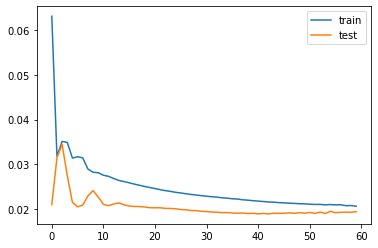

Test RMSE: 1711499.654


In [16]:
...
# split into train and test sets
values = reframed.values
#n_train_hours = 365 * 24
train = values[:828, :]
test = values[828:1034, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=256, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, 1:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,60]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate(( test_X[:, 1:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,60]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [17]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(inv_y, inv_yhat)

687402.816333462

In [18]:
#Mean Absolute percentage error
MAPE = np.mean(np.abs((inv_y - inv_yhat) / inv_y))*100
MAPE

21.95637167172996

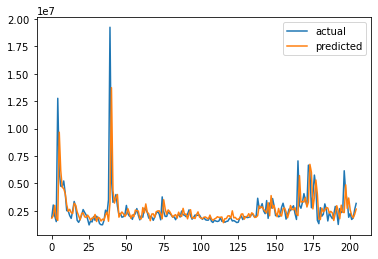

In [19]:
#Plot for actual vs predicted
pyplot.plot(inv_y, label='actual')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()